In [1]:
from citipy import citipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from config import weather_api_key,g_key
import scipy.stats as sts
from scipy.stats import linregress
import time

In [2]:
lat=np.random.uniform(-90.00,90.00,10000)

In [3]:
lon=np.random.uniform(-180,180.00,10000)

In [4]:
coordinates=list(zip(lat,lon))

In [5]:
cities=set()

In [6]:

for nos in coordinates:
    citi=citipy.nearest_city(nos[0],nos[1])
    city=citi.city_name
    cities.add(city)
    if len(cities)==600:
        break

In [7]:
len(cities)

600

In [8]:
cities=list(cities)

In [9]:
type(cities)

list

In [10]:
cities=pd.DataFrame({'Cities':cities})
cities.head()

Cities
0  rancho palos verdes
1                sitka
2       port elizabeth
3            coihaique
4              dolores

In [11]:
cities['Latitude']=0
cities['Longitude']=0
cities['Cloudiness']=0
cities['Date']=""
cities['Humidity']=0
cities['Max_Temp']=0
cities['Wind Speed']=0

In [12]:
cities.head()

Cities  Latitude  Longitude  Cloudiness Date  Humidity  \
0  rancho palos verdes         0          0           0              0   
1                sitka         0          0           0              0   
2       port elizabeth         0          0           0              0   
3            coihaique         0          0           0              0   
4              dolores         0          0           0              0   

   Max_Temp  Wind Speed  
0         0           0  
1         0           0  
2         0           0  
3         0           0  
4         0           0

In [13]:
# url='http://api.openweathermap.org/data/2.5/weather?'

In [14]:
# lat=response['coord']['lat']
# lon=response['coord']['lon']
# cloudiness=response['clouds']['all']
# date=response['dt']
# humidity=response['main']['humidity']
# max_temp=response['main']['temp_max']
# wind=response['wind']['speed']


In [15]:
counter=0
record=1
sets=1
print("="*30)
print("Begining Data Retrieval")
print("="*30)
print()

for index,row in cities.iterrows():
    print("Searching record {} of set {}  | {}".format(record,sets,row['Cities']))
    #print("Searching for {}".format(row['Cities']))
    url='http://api.openweathermap.org/data/2.5/weather?'
    q=row['Cities']
    params={'q':q, 'appid': weather_api_key,'units':'Imperial'}
    response=requests.get(url,params=params).json()
    try:
        cities.loc[index,'Latitude'] = response['coord']['lat']
        cities.loc[index,'Longitude'] = response['coord']['lon']
        cities.loc[index,'Cloudiness'] = response['clouds']['all']
        cities.loc[index,'Date'] = response['dt']
        cities.loc[index,'Humidity'] = response['main']['humidity']  
        cities.loc[index,'Max_Temp'] = response['main']['temp_max']
        cities.loc[index,'Wind Speed'] = response['wind']['speed']
    except KeyError:
        print("*"*30)
        print("Sorry couldn't find {}".format(row['Cities']))
        print("*"*30)
        
            
    record+=1
    if record ==51:
        print("-"*75)
        print("Counter has reached 50, program will pause for 1 second before resuming")
        print("-"*75)
        record=1
        sets+=1 
        time.sleep(1)

print()
print("="*30)
print("Data Retrieval Complete")
print("="*30)

Begining Data Retrieval

Searching record 1 of set 1  | rancho palos verdes
Searching record 2 of set 1  | sitka
Searching record 3 of set 1  | port elizabeth
Searching record 4 of set 1  | coihaique
Searching record 5 of set 1  | dolores
Searching record 6 of set 1  | qitaihe
Searching record 7 of set 1  | kamenka
Searching record 8 of set 1  | nome
Searching record 9 of set 1  | carnarvon
Searching record 10 of set 1  | moengo
Searching record 11 of set 1  | arraial do cabo
Searching record 12 of set 1  | faanui
Searching record 13 of set 1  | sumbawa
******************************
Sorry couldn't find sumbawa
******************************
Searching record 14 of set 1  | promyshlennyy
Searching record 15 of set 1  | yar-sale
Searching record 16 of set 1  | ahipara
Searching record 17 of set 1  | guangyuan
Searching record 18 of set 1  | batticaloa
Searching record 19 of set 1  | marystown
Searching record 20 of set 1  | saint albans
Searching record 21 of set 1  | praia da vitoria
Se

Searching record 15 of set 4  | newberry
Searching record 16 of set 4  | teresopolis
Searching record 17 of set 4  | karla
Searching record 18 of set 4  | hobart
Searching record 19 of set 4  | morvi
Searching record 20 of set 4  | taoudenni
Searching record 21 of set 4  | faya
Searching record 22 of set 4  | meulaboh
Searching record 23 of set 4  | avera
Searching record 24 of set 4  | vila franca do campo
Searching record 25 of set 4  | goderich
Searching record 26 of set 4  | lethem
Searching record 27 of set 4  | hofn
Searching record 28 of set 4  | bambous virieux
Searching record 29 of set 4  | kribi
Searching record 30 of set 4  | erandio
Searching record 31 of set 4  | stornoway
Searching record 32 of set 4  | pevek
Searching record 33 of set 4  | qaqortoq
Searching record 34 of set 4  | porto torres
Searching record 35 of set 4  | yellowknife
Searching record 36 of set 4  | lyubar
Searching record 37 of set 4  | port alfred
Searching record 38 of set 4  | dzerzhinsk
Searching 

Searching record 11 of set 7  | poretskoye
Searching record 12 of set 7  | vaitupu
******************************
Sorry couldn't find vaitupu
******************************
Searching record 13 of set 7  | chuy
Searching record 14 of set 7  | broken hill
Searching record 15 of set 7  | hambantota
Searching record 16 of set 7  | saskylakh
Searching record 17 of set 7  | campo verde
Searching record 18 of set 7  | atuona
Searching record 19 of set 7  | phek
Searching record 20 of set 7  | bredasdorp
Searching record 21 of set 7  | airai
Searching record 22 of set 7  | kodiak
Searching record 23 of set 7  | ruatoria
******************************
Sorry couldn't find ruatoria
******************************
Searching record 24 of set 7  | pochutla
Searching record 25 of set 7  | tukrah
Searching record 26 of set 7  | shimoda
Searching record 27 of set 7  | ancud
Searching record 28 of set 7  | severo-kurilsk
Searching record 29 of set 7  | chokurdakh
Searching record 30 of set 7  | redlands


Searching record 16 of set 10  | samalaeulu
******************************
Sorry couldn't find samalaeulu
******************************
Searching record 17 of set 10  | zhanatas
******************************
Sorry couldn't find zhanatas
******************************
Searching record 18 of set 10  | heihe
Searching record 19 of set 10  | lorengau
Searching record 20 of set 10  | mabaruma
Searching record 21 of set 10  | oropesa
Searching record 22 of set 10  | harpanahalli
Searching record 23 of set 10  | prince rupert
Searching record 24 of set 10  | te anau
Searching record 25 of set 10  | kruisfontein
Searching record 26 of set 10  | hay river
Searching record 27 of set 10  | matata
Searching record 28 of set 10  | humboldt
Searching record 29 of set 10  | mount gambier
Searching record 30 of set 10  | kahone
Searching record 31 of set 10  | patrocinio
Searching record 32 of set 10  | havelock
Searching record 33 of set 10  | houma
Searching record 34 of set 10  | aktash
Searching

In [16]:
cities.shape

(600, 8)

In [71]:
df_cities=(cities[cities['Latitude']!=0])

In [72]:
df_cities.head()

Cities  Latitude  Longitude  Cloudiness        Date  Humidity  \
0  rancho palos verdes     33.74    -118.39          40  1600018654        77   
1                sitka     57.05    -135.33           1  1600018660        71   
2       port elizabeth    -33.92      25.57          20  1600018661        72   
3            coihaique    -45.58     -72.07          40  1600018661        72   
4              dolores    -36.31     -57.68          51  1600018661        51   

   Max_Temp  Wind Speed  
0     72.00        7.83  
1     51.80        4.05  
2     59.00       17.22  
3     50.00        6.93  
4     66.42        9.86

In [73]:
df_cities.shape

(552, 8)

In [74]:
lat=df_cities['Latitude']
humidity=df_cities['Humidity']
cloudiness=df_cities['Cloudiness']
wind_speed=df_cities['Wind Speed']
temp=df_cities['Max_Temp']

(-0.3188640978685947, 1.6427133493239305e-14)

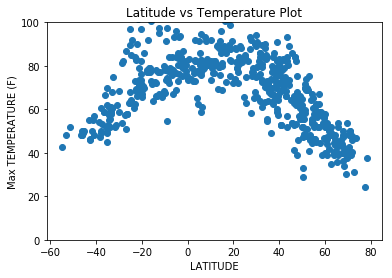

In [78]:
plt.scatter(lat,temp)
plt.ylabel('Max TEMPERATURE (F)')
plt.xlabel('LATITUDE')
plt.ylim(0,100)
plt.title('Latitude vs Temperature Plot')
corr=sts.pearsonr(temp,lat);
corr

(0.17191489937137616, 4.90314488102486e-05)

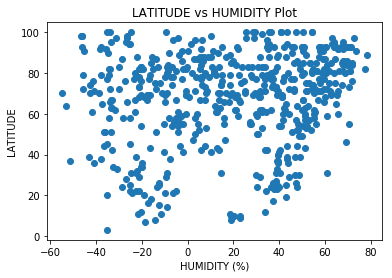

In [79]:
plt.scatter(lat,humidity)
plt.xlabel('HUMIDITY (%)')
plt.ylabel('LATITUDE')
plt.title('LATITUDE vs HUMIDITY Plot')
corr=sts.pearsonr(humidity,lat);
corr

(0.19651036044812617, 3.288657894502744e-06)

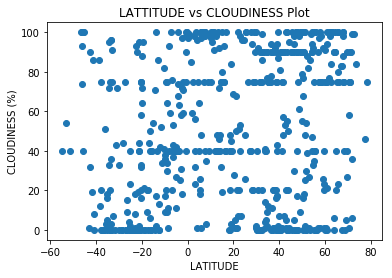

In [80]:
plt.scatter(lat,cloudiness)
plt.ylabel('CLOUDINESS (%)')
plt.xlabel('LATITUDE')
plt.title('LATTITUDE vs CLOUDINESS Plot')
corr=sts.pearsonr(cloudiness,lat);
corr

(-0.10887177194735152, 0.01047560022620967)

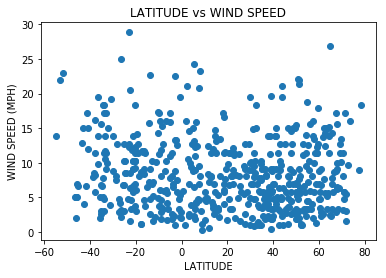

In [81]:
plt.scatter(lat,wind_speed)
plt.xlabel('LATITUDE')
plt.ylabel('WIND SPEED (MPH)')
plt.title('LATITUDE vs WIND SPEED')
corr=sts.pearsonr(wind_speed,lat);
corr

In [82]:
df_south=df_cities[df_cities['Latitude'] < 0]
df_north=df_cities[df_cities['Latitude'] >= 0]

In [93]:
df_south

Cities  Latitude  Longitude  Cloudiness        Date  Humidity  \
2     port elizabeth    -33.92      25.57          20  1600018661        72   
3          coihaique    -45.58     -72.07          40  1600018661        72   
4            dolores    -36.31     -57.68          51  1600018661        51   
8          carnarvon    -24.87     113.63           0  1600018662       100   
10   arraial do cabo    -22.97     -42.03           8  1600018663        61   
11            faanui    -16.48    -151.75          50  1600018663        79   
15           ahipara    -35.17     173.17          18  1600018664        77   
22           quixada     -4.97     -39.02          27  1600018666        22   
24          imbituva    -25.23     -50.60           0  1600018667        22   
29         mahebourg    -20.41      57.70          75  1600018668        83   
32        valparaiso    -33.04     -71.63           0  1600018386        42   
34           mataura    -46.19     168.86          93  1600018670        98   
39            olinda     -8.01     -34.86          40  1600018672        58   
41          coquimbo    -29.95     -71.34           0  1600018672        72   
42           merauke     -8.47     140.33          11  1600018673        81   
46        codrington    -38.27     141.97          12  1600018651        92   
47         boyolangu     -8.12     111.89          93  1600018674        90   
49          saldanha    -33.01      17.94          91  1600018674        63   
51          cururupu     -1.83     -44.87          59  1600018676        55   
53          madingou     -4.15      13.55          68  1600018677        51   
56     borda da mata    -22.27     -46.17           0  1600018678        32   
57    port macquarie    -31.43     152.92          43  1600018678        97   
58      porto seguro    -16.45     -39.06          40  1600018679        69   
59            castro    -24.79     -50.01           0  1600018679        31   
60          ivaipora    -24.25     -51.68           0  1600018679        21   
61        talcahuano    -36.72     -73.12           0  1600018679        51   
62      port lincoln    -34.73     135.87           2  1600018680        90   
74           iquitos     -3.75     -73.25          40  1600018683        56   
81     pimenta bueno    -11.67     -61.19          52  1600018684        11   
83           itarema     -2.92     -39.92          31  1600018685        59   
..               ...       ...        ...         ...         ...       ...   
504        kununurra    -15.77     128.73          40  1600018820        88   
505          ushuaia    -54.80     -68.30          40  1600018608        70   
507          kavieng     -2.57     150.80          18  1600018821        77   
509         hermanus    -34.42      19.23          72  1600018821        79   
511            bluff    -46.60     168.33         100  1600018822        98   
521  barra do garcas    -15.89     -52.26           0  1600018824        18   
527        isla pucu    -25.30     -56.90          40  1600018826        25   
530         necochea    -38.55     -58.74          86  1600018735        70   
534        colesberg    -30.72      25.10          72  1600018827        33   
535         souillac    -20.52      57.52          75  1600018827        83   
543           vanimo     -2.67     141.30          72  1600018829        86   
544          honiara     -9.43     159.95          20  1600018830       100   
546            coxim    -18.51     -54.76           0  1600018830         7   
550             sola    -13.88     167.55         100  1600018832        87   
552          panguna     -6.32     155.48          37  1600018833        96   
553           rawson    -43.30     -65.10           1  1600018833        39   
554          isangel    -19.55     169.27          95  1600018833        82   
556   saint-philippe    -21.36      55.77          44  1600018834        73   
557            pisco    -13.70     -76.22           2  160001869

In [83]:
lat_s=df_south['Latitude']
lat_n=df_north['Latitude']

In [84]:
df_north.head()

Cities  Latitude  Longitude  Cloudiness        Date  Humidity  \
0  rancho palos verdes     33.74    -118.39          40  1600018654        77   
1                sitka     57.05    -135.33           1  1600018660        71   
5              qitaihe     45.80     130.85         100  1600018662        90   
6              kamenka     51.32      42.77           2  1600018662        43   
7                 nome     64.50    -165.41          90  1600018390        87   

   Max_Temp  Wind Speed  
0     72.00        7.83  
1     51.80        4.05  
5     53.53        2.75  
6     58.32        7.61  
7     48.20       13.87

In [85]:
temp_n=df_north['Max_Temp']
temp_s=df_south['Max_Temp']
hum_n=df_north['Humidity']
hum_s=df_south['Humidity']
cloud_n=df_north['Cloudiness']
cloud_s=df_south['Cloudiness']
wind_n=df_north['Wind Speed']
wind_s=df_south['Wind Speed']

### Regression Analysis

### Latitude (N) vs Max Temp

In [102]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),temp_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = -0.66x + 93.16'

Text(0, 0.5, 'Max Temp (F)')

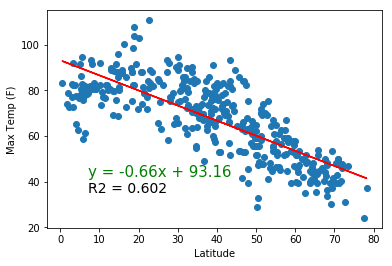

In [103]:
plt.scatter(lat_n,temp_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(7,42),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(7,35),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

### Latitude (S) vs Max Temp

In [99]:
(slope1,intercept1,rvalue1,pvalue1,stderr1)=linregress(lat_s.astype(float),temp_s.astype(float))

regress_values1 = lat_s*slope1 +intercept1

line_eq1= "y = " + str(round(slope1,2)) + "x + "+ str(round(intercept1,2))

line_eq1

'y = 0.79x + 87.97'

In [100]:
rvalue1

0.703693072991822

Text(0, 0.5, 'Max Temp (F)')

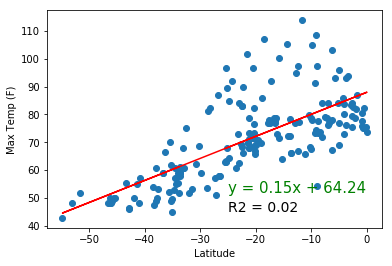

In [107]:
plt.scatter(lat_s,temp_s)
plt.plot(lat_s,regress_values1,"red")
plt.annotate(line_eq,(-25,52),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-25,45),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

### Latitude (N) vs Humidity

In [104]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),hum_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.15x + 64.24'

Text(0, 0.5, 'Max Temp (F)')

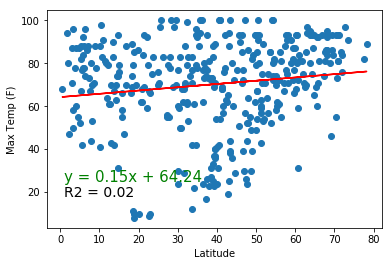

In [109]:
plt.scatter(lat_n,hum_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(1,25),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(1,18),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

### Latitude (S) vs Humidity

In [110]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),hum_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = -0.15x + 59.5'

Text(0, 0.5, 'Humidity')

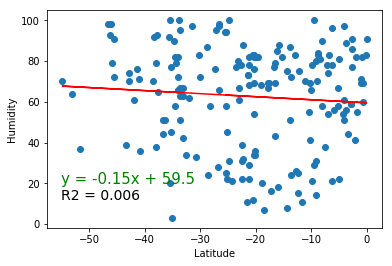

In [114]:
plt.scatter(lat_s,hum_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-55,20),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-55,12),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

### Latitude(N) vs Cloudiness

In [115]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),cloud_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.0x + 55.25'

Text(0, 0.5, 'Cloudiness')

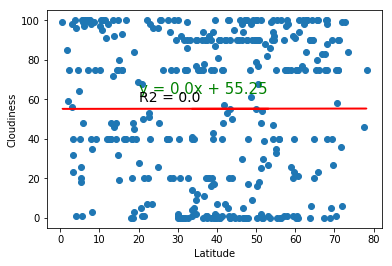

In [120]:
plt.scatter(lat_n,cloud_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(20,63),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(20,59),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

### Latitude (S) vs Cloudiness

In [121]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),cloud_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.34x + 45.55'

Text(0, 0.5, 'Cloudiness')

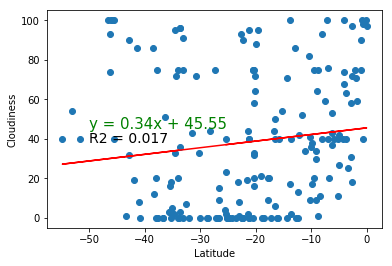

In [124]:
plt.scatter(lat_s,cloud_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-50,45),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-50,38),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

### Latitude (N) vs Wind Speed

In [125]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_n.astype(float),wind_n.astype(float))

regress_values = lat_n*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = 0.01x + 7.53'

Text(0, 0.5, 'Wind Speed mph')

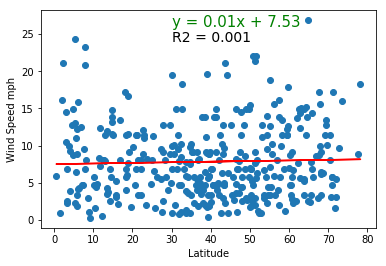

In [128]:
plt.scatter(lat_n,wind_n)
plt.plot(lat_n,regress_values,"red")
plt.annotate(line_eq,(30,26),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(30,24),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')

### Latitude (S) vs Wind Speed

In [129]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(lat_s.astype(float),wind_s.astype(float))

regress_values = lat_s*slope +intercept

line_eq= "y = " + str(round(slope,2)) + "x + "+ str(round(intercept,2))

line_eq

'y = -0.07x + 7.74'

Text(0, 0.5, 'Wind Speed mph')

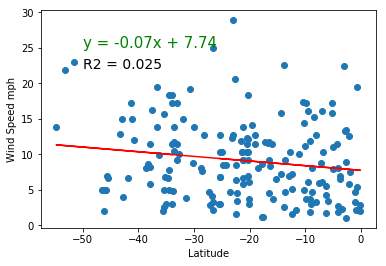

In [132]:
plt.scatter(lat_s,wind_s)
plt.plot(lat_s,regress_values,"red")
plt.annotate(line_eq,(-50,25),color="green",fontsize=15)
plt.annotate(f"R2 = {round(rvalue**2,3)}",(-50,22),fontsize=14,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')